## Team Member Names: Madeline Witters {-}

## Project Title: Predicting Customer Churn and Identifying Attributes of At-Risk Customers {-}

In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")
data = data.drop("customer_id", axis=1)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [40]:
#EDA to do list: 
# drop customer_id column DONE
# check for missing data DONE
# create boxplots for categorical variables DONE
# create density plots/histograms for quantitative vars DONE
#One Hot encoding: gender, country, Balance DONE

#info on why it's best to not do too much one-hot encoding for trees: 
#https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

#11/16 TO DO LIST: 

#outlier removal (do before standardization): 
#https://medium.com/geekculture/essential-guide-to-handle-outliers-for-your-logistic-regression-model-63c97690a84d

#check for multicollinearity: corr plot? DONE

#split into train/test DONE

#standardize data

#Lasso variable selection

In [5]:
null_check = data.isnull().any() #no missing data in the dataframe
null_check

credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [6]:
data.min()

credit_score           350
country             France
gender              Female
age                     18
tenure                   0
balance                0.0
products_number          1
credit_card              0
active_member            0
estimated_salary     11.58
churn                    0
dtype: object

In [7]:
data.max()

credit_score              850
country                 Spain
gender                   Male
age                        92
tenure                     10
balance             250898.09
products_number             4
credit_card                 1
active_member               1
estimated_salary    199992.48
churn                       1
dtype: object

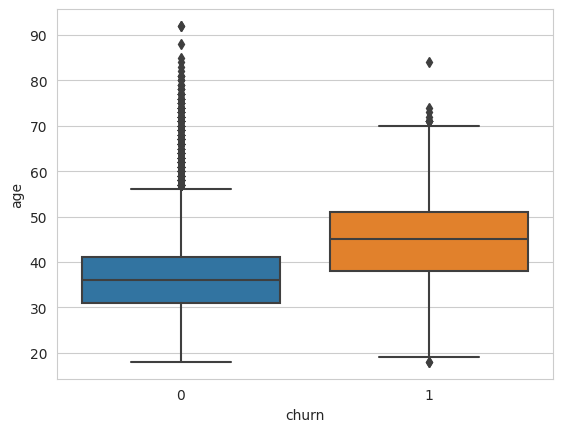

In [8]:
sns.set_style('whitegrid')
ax = sns.boxplot(x='churn', y='age', data=data)

<AxesSubplot:xlabel='balance', ylabel='Count'>

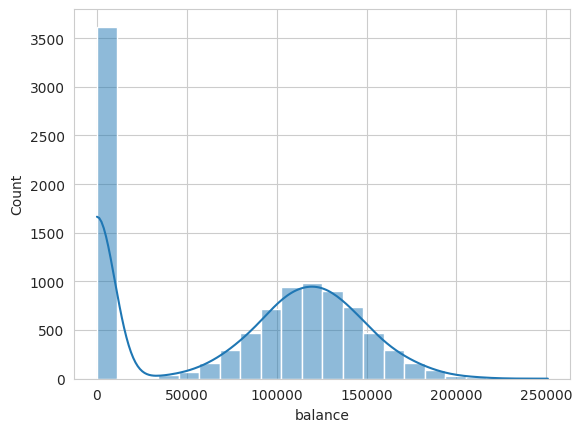

In [9]:
sns.histplot(data=data, x="balance", kde=True)

In [10]:
#sns.histplot(data=data, x="estimated_salary", kde=True)

In [11]:
#sns.histplot(data=data, x="age", kde=True)

In [12]:
#sns.histplot(data=data, x="tenure", kde=True)

In [13]:
#sns.histplot(data=data, x="products_number", kde=True)

In [14]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [15]:
g_one_hot = pd.get_dummies(data['gender'])
g_one_hot.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [16]:
data = data.drop('gender',axis = 1)
# Join the encoded df
data = data.join(g_one_hot)
data.head()

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Female,Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
c_one_hot = pd.get_dummies(data['country'])
c_one_hot.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [18]:
data2 = data.drop('country',axis = 1)
data2 = data2.join(c_one_hot)
data2.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [19]:
data2['zero_balance'] = np.where(data2['balance'] == 0.0, 1, 0)

In [20]:
data2.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Female,Male,France,Germany,Spain,zero_balance
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1,0


In [21]:
data2 = data2.drop('balance',axis = 1)

In [22]:
data2.head()

,credit_score,age,tenure,products_number,credit_card,active_member,estimated_salary,churn,Female,Male,France,Germany,Spain,zero_balance
0,619,42,2,1,1,1,101348.88,1,1,0,1,0,0,1
1,608,41,1,1,0,1,112542.58,0,1,0,0,0,1,0
2,502,42,8,3,1,0,113931.57,1,1,0,1,0,0,0
3,699,39,1,2,0,0,93826.63,0,1,0,1,0,0,1
4,850,43,2,1,1,1,79084.10,0,1,0,0,0,1,0


In [23]:
data2.dtypes

credit_score          int64
age                   int64
tenure                int64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
Female                uint8
Male                  uint8
France                uint8
Germany               uint8
Spain                 uint8
zero_balance          int64
dtype: object

In [50]:
corr_matrix = data2.corr().round(2)
print(corr_matrix)

                  credit_score   age  tenure  products_number  credit_card  \
credit_score              1.00 -0.00    0.00             0.01        -0.01   
age                      -0.00  1.00   -0.01            -0.03        -0.01   
tenure                    0.00 -0.01    1.00             0.01         0.02   
products_number           0.01 -0.03    0.01             1.00         0.00   
credit_card              -0.01 -0.01    0.02             0.00         1.00   
active_member             0.03  0.09   -0.03             0.01        -0.01   
estimated_salary         -0.00 -0.01    0.01             0.01        -0.01   
churn                    -0.03  0.29   -0.01            -0.05        -0.01   
Female                    0.00  0.03   -0.01             0.02        -0.01   
Male                     -0.00 -0.03    0.01            -0.02         0.01   
France                   -0.01 -0.04   -0.00             0.00         0.00   
Germany                   0.01  0.05   -0.00            -0.01   

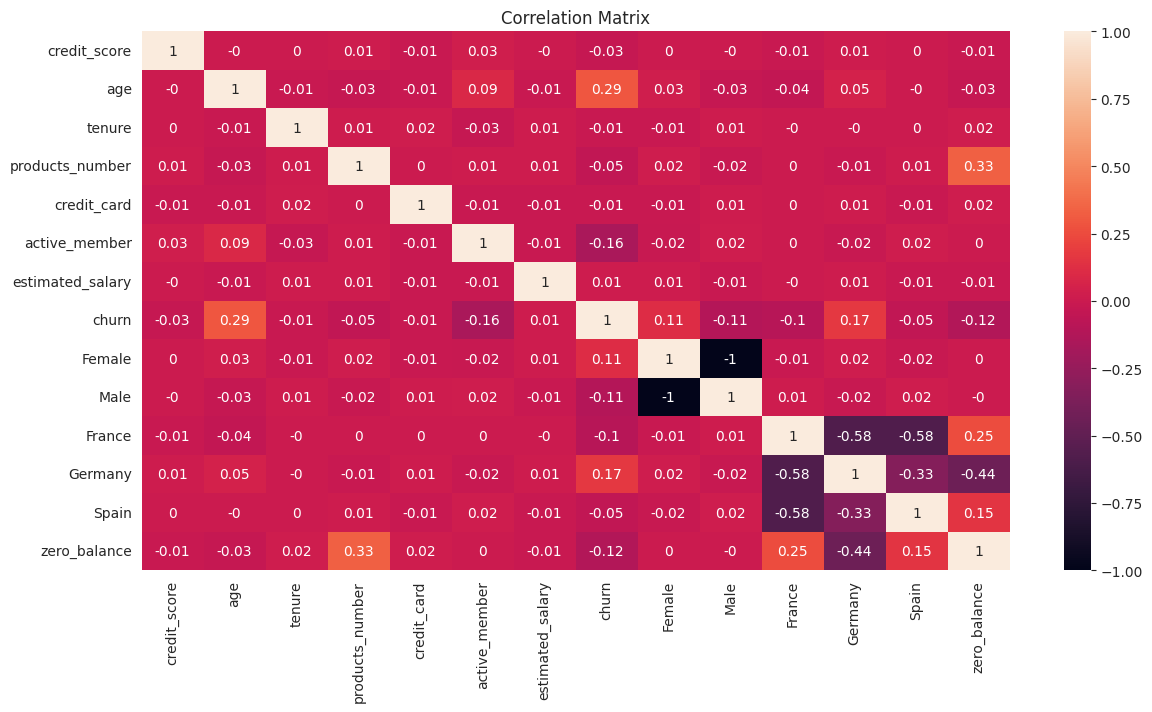

In [53]:
plt.figure(figsize = (14,7))
sns.heatmap(corr_matrix, annot=True)
plt.title(label="Correlation Matrix")
plt.show()

In [42]:
train, test = train_test_split(data2, test_size=0.2, random_state=4)

In [43]:
train['churn'].value_counts()

0    6359
1    1641
Name: churn, dtype: int64

In [44]:
test['churn'].value_counts()

0    1604
1     396
Name: churn, dtype: int64

In [66]:
scaler = StandardScaler() #note: need to fix/finish scaling and then re-run Lasso
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [69]:
lasso = LassoCV(cv=10).fit(train.loc[:, train.columns != 'churn'], train['churn'])

/home/mmwitters/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [48]:
lasso.coef_

array([-3.97968117e-05,  8.12640182e-03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  9.85866417e-08,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00])

In [55]:
#coeffs identified as important via Lasso: credit_score, age, estimated_salary

In [49]:
lasso.alpha_

0.3035971608271875